In [103]:
import pandas as pd

In [104]:
data = pd.read_csv('E:\Gem-stone-price-prediction-End-to-End-MLpipeline\data\cubic_zirconia.csv')

In [105]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


Information about Variables

Carat -> Carat weight of the cubic zirconia.

Cut ->  Describe the cut quality of the cubic zirconia. Quality is increasing order Fair,Good,Very Good,Premium,Ideal.

Color ->  Colour of the cubic zirconia.With D being the best and J the worst.

Clarity ->  cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst,

FL= flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

Depth ->  The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

Table ->  The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

Price ->  the Price of the cubic zirconia.

X -> Length of the cubic zirconia in mm.

Y ->  Width of the cubic zirconia in mm.

Z ->  Height of the cubic zirconia in mm.

In [106]:
data.sample(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
2818,2819,1.27,Very Good,I,SI1,63.1,59.0,6.83,6.87,4.32,5953
6275,6276,0.32,Premium,H,SI1,62.3,60.0,4.36,4.40,2.73,461
13780,13781,0.40,Ideal,G,VVS2,61.4,53.0,4.73,4.81,2.93,883
10426,10427,0.60,Very Good,G,SI1,63.1,57.0,5.32,5.41,3.39,1565
18352,18353,0.71,Premium,G,SI1,61.3,57.0,5.74,5.72,3.51,2386
23357,23358,0.56,Ideal,G,VVS2,60.7,56.0,5.33,5.32,3.23,2167
5954,5955,0.77,Premium,I,VS2,60.3,58.0,5.96,5.94,3.59,2375
23338,23339,0.30,Very Good,E,VVS2,61.3,59.0,4.30,4.32,2.64,789
12010,12011,0.40,Ideal,D,VVS2,61.4,56.0,4.80,4.75,2.93,1152
21900,21901,1.52,Ideal,I,SI1,61.2,55.4,7.38,7.45,4.54,9067


In [107]:
data.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [108]:
data.shape

(26967, 11)

In [109]:
data.dropna(axis=0,inplace=True)

In [110]:
data.shape

(26270, 11)

In [111]:
data.nunique()

Unnamed: 0    26270
carat           256
cut               5
color             7
clarity           8
depth           169
table           112
x               530
y               525
z               354
price          8629
dtype: int64

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26270 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26270 non-null  int64  
 1   carat       26270 non-null  float64
 2   cut         26270 non-null  object 
 3   color       26270 non-null  object 
 4   clarity     26270 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26270 non-null  float64
 7   x           26270 non-null  float64
 8   y           26270 non-null  float64
 9   z           26270 non-null  float64
 10  price       26270 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.4+ MB


In [113]:
data = data.drop('Unnamed: 0',axis=1)

In [114]:
X = data.drop('price',axis=1)
y=data['price']

In [115]:
cat_columns = data.columns[data.dtypes=='object']

In [116]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65
...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60


In [117]:
num_columns = X.columns[X.dtypes!='object']

In [118]:
data[cat_columns]

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1
...,...,...,...
26962,Premium,G,SI1
26963,Ideal,H,IF
26964,Premium,E,VS2
26965,Very Good,F,VVS2


In [119]:
data[num_columns]

,carat,depth,table,x,y,z
0,0.30,62.1,58.0,4.27,4.29,2.66
1,0.33,60.8,58.0,4.42,4.46,2.70
2,0.90,62.2,60.0,6.04,6.12,3.78
3,0.42,61.6,56.0,4.82,4.80,2.96
4,0.31,60.4,59.0,4.35,4.43,2.65
...,...,...,...,...,...,...
26962,1.11,62.3,58.0,6.61,6.52,4.09
26963,0.33,61.9,55.0,4.44,4.42,2.74
26964,0.51,61.7,58.0,5.12,5.15,3.17
26965,0.27,61.8,56.0,4.19,4.20,2.60


In [120]:
data[num_columns].describe()

,carat,depth,table,x,y,z
count,26270.000000,26270.000000,26270.000000,26270.000000,26270.000000,26270.000000
mean,0.797995,61.745147,57.456011,5.729167,5.732967,3.536636
std,0.477214,1.412860,2.230776,1.127515,1.166330,0.699335
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.900000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000
max,4.500000,73.600000,79.000000,10.230000,58.900000,8.060000


In [121]:
for col in cat_columns:
    print(data[col].value_counts())

cut
Ideal        10546
Premium       6707
Very Good     5878
Good          2382
Fair           757
Name: count, dtype: int64
color
G    5529
E    4793
F    4612
H    3991
D    3268
I    2676
J    1401
Name: count, dtype: int64
clarity
SI1     6408
VS2     5925
SI2     4447
VS1     3991
VVS2    2479
VVS1    1791
IF       874
I1       355
Name: count, dtype: int64


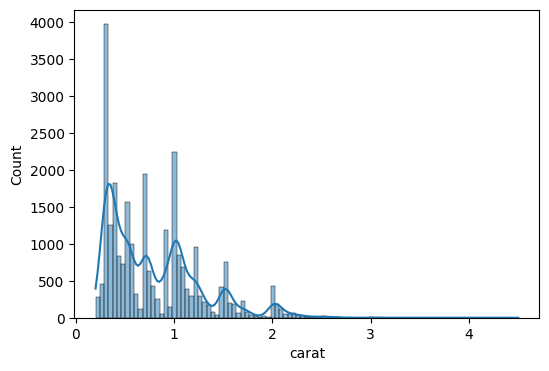

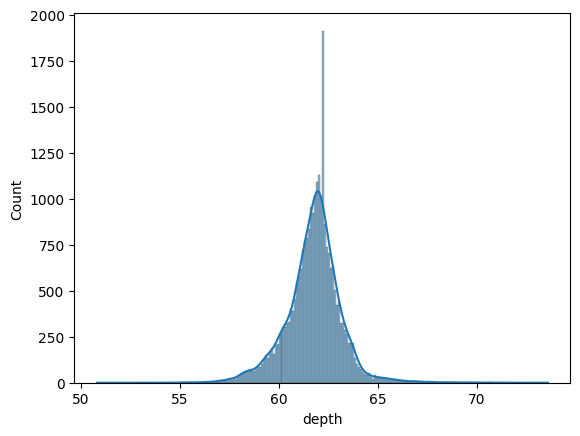

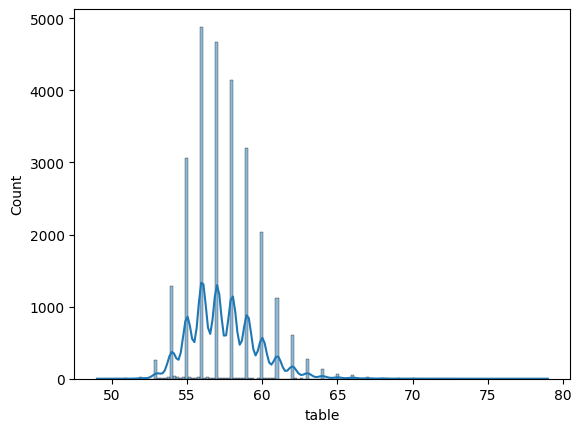

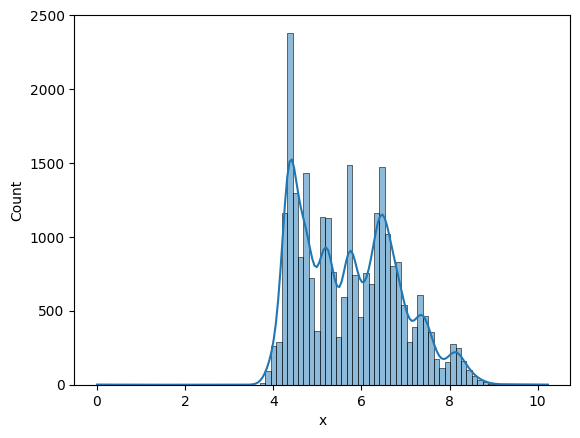

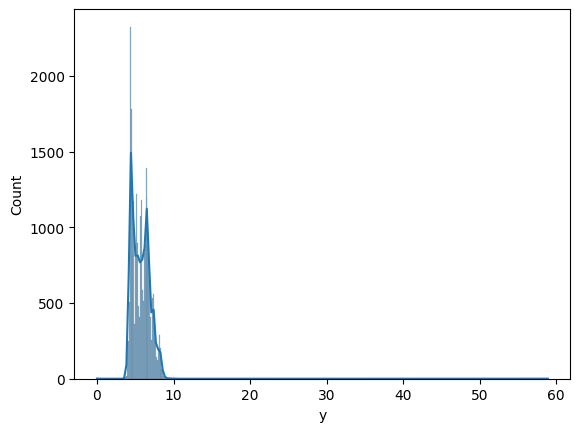

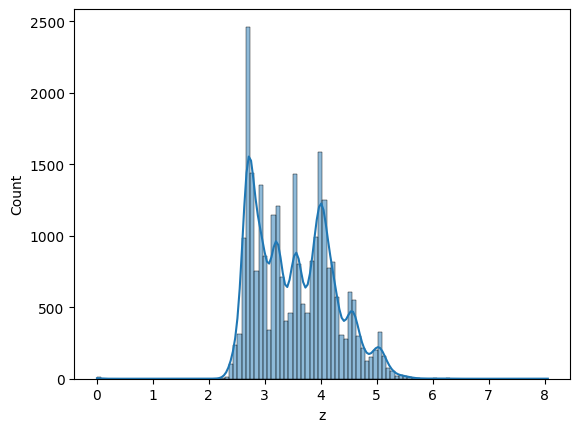

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))

for col in num_columns:
    sns.histplot(data=data,x=col,kde=True)
    print('\n')
    plt.show()

<Axes: >

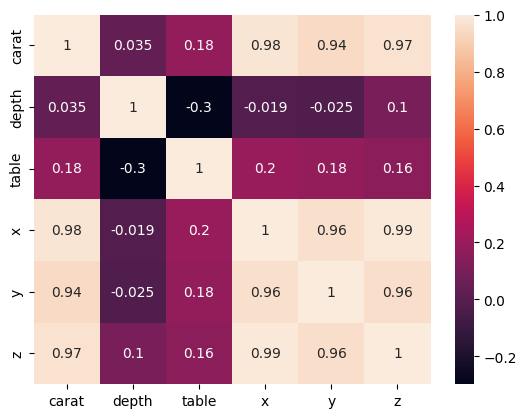

In [123]:
sns.heatmap(data[num_columns].corr(),annot=True)

Price is highly correlated with price and x,y,z dimensions

In [124]:
#ordinal encoding for cat_columns
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [125]:
data["cut"]=data["cut"].map(cut_map)
data["clarity"] =  data["clarity"].map(clarity_map)
data["color"] = data["color"].map(color_map)

In [126]:
data.sample(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
7700,0.53,5,2,4,62.0,56.0,5.16,5.20,3.21,1739
9910,0.41,2,1,3,63.1,57.0,4.68,4.73,2.97,717
20537,0.39,5,1,6,60.0,56.0,4.79,4.77,2.87,1088
1428,0.31,4,2,5,61.0,60.0,4.37,4.35,2.66,816
9231,0.90,2,3,2,58.0,57.0,6.34,6.41,3.70,3770
24670,0.56,5,4,4,61.2,56.0,5.29,5.33,3.25,1580
21054,0.50,2,3,4,58.8,64.0,5.21,5.16,3.05,1433
19120,0.77,5,5,3,61.7,56.0,5.90,5.85,3.62,2612
24238,0.31,3,2,4,61.8,59.0,4.30,4.37,2.68,680
20200,0.70,3,4,5,61.7,59.0,5.66,5.69,3.50,2676


In [127]:
from sklearn.impute import SimpleImputer #Handling missing values
from sklearn.preprocessing import StandardScaler #Handling Feature scaling
from sklearn.preprocessing import OrdinalEncoder # ordinal Encoding
#pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer # compose all the stages for data preprocessing

stages Composed
data ingestion
EDA
Preprocessing
Model Building
Model Evaluation


In [142]:
num_pipeline = Pipeline(steps=[('imputer',SimpleImputer()),('scaler',StandardScaler())])

In [129]:
cut_categories=['Fair','Good','Very Good','Premium','Ideal']
color_categories = ['D','E','F','G','H','I','J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [130]:
cat_pipeline = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
('encoding',OrdinalEncoder(categories = [cut_categories,color_categories,clarity_categories]))])

In [131]:
num_columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [145]:
preprocessor = ColumnTransformer(
    [
        ("num_pipeline",num_pipeline,num_columns),
        ("cat_pipeline",cat_pipeline,cat_columns,)
    ]
)

In [140]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65
...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60


In [137]:
y.head()

0     499
1     984
2    6289
3    1082
4     779
Name: price, dtype: int64

In [135]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [141]:
X_train.shape

(18389, 9)

In [146]:
preprocessor.fit_transform(X_train)

array([[ 0.46530655, -0.31875892, -0.20473431, ...,  4.        ,
         5.        ,  2.        ],
       [-0.18438346,  1.73022826, -0.20473431, ...,  1.        ,
         5.        ,  2.        ],
       [-0.87598895,  0.10516946, -0.65215951, ...,  4.        ,
         3.        ,  2.        ],
       ...,
       [-1.16939734, -0.24810419,  1.13754126, ...,  2.        ,
         0.        ,  3.        ],
       [-0.62449604,  0.10516946, -1.0995847 , ...,  4.        ,
         0.        ,  4.        ],
       [-0.45683411,  0.03451473, -0.20473431, ...,  4.        ,
         1.        ,  5.        ]])

In [147]:
preprocessor.transform(X_test)

array([[-0.83407347, -0.24810419, -1.0995847 , ...,  4.        ,
         6.        ,  2.        ],
       [ 0.96829237,  0.52909785, -0.20473431, ...,  4.        ,
         0.        ,  3.        ],
       [ 3.00119337, -0.31875892,  1.13754126, ...,  3.        ,
         6.        ,  1.        ],
       ...,
       [-0.81311573, -0.38941365, -0.65215951, ...,  4.        ,
         2.        ,  5.        ],
       [-0.98077766,  0.38778839,  0.24269088, ...,  3.        ,
         2.        ,  1.        ],
       [-0.39396088,  0.67040731,  0.24269088, ...,  4.        ,
         3.        ,  6.        ]])

In [148]:
preprocessor.get_feature_names_out()

array(['num_pipeline__carat', 'num_pipeline__depth',
       'num_pipeline__table', 'num_pipeline__x', 'num_pipeline__y',
       'num_pipeline__z', 'cat_pipeline__cut', 'cat_pipeline__color',
       'cat_pipeline__clarity'], dtype=object)

In [150]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [151]:
X_train

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,0.465307,-0.318759,-0.204734,0.657634,0.678650,0.619916,4.0,5.0,2.0
1,-0.184383,1.730228,-0.204734,-0.123329,-0.143953,0.061564,1.0,5.0,2.0
2,-0.875989,0.105169,-0.652160,-0.966414,-0.948674,-0.940606,4.0,3.0,2.0
3,-1.022693,1.094336,-0.204734,-1.268150,-1.252679,-1.155357,1.0,3.0,2.0
4,-0.792158,0.175824,-1.099585,-0.788922,-0.823495,-0.783123,4.0,2.0,6.0
...,...,...,...,...,...,...,...,...,...
18384,2.540123,-1.731854,1.584966,2.139688,2.198677,1.865470,2.0,1.0,1.0
18385,-0.603538,-0.742687,0.690116,-0.504936,-0.483724,-0.568372,3.0,2.0,3.0
18386,-1.169397,-0.248104,1.137541,-1.552136,-1.547743,-1.556225,2.0,0.0,3.0
18387,-0.624496,0.105169,-1.099585,-0.567058,-0.546313,-0.539738,4.0,0.0,4.0


In [152]:
X_test

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,-0.834073,-0.248104,-1.099585,-0.868794,-0.832436,-0.869023,4.0,6.0,2.0
1,0.968292,0.529098,-0.204734,1.039241,1.000538,1.092367,4.0,0.0,3.0
2,3.001193,-0.318759,1.137541,2.370427,2.341739,2.280655,3.0,6.0,1.0
3,1.114997,0.529098,0.242691,1.119112,1.161482,1.206901,3.0,1.0,1.0
4,-0.792158,0.317134,-1.502267,-0.824421,-0.805612,-0.768806,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...
7876,-0.540665,0.034515,1.137541,-0.469438,-0.510548,-0.482472,3.0,4.0,1.0
7877,0.046152,0.246479,-0.204734,0.276027,0.240524,0.290631,4.0,0.0,1.0
7878,-0.813116,-0.389414,-0.652160,-0.842170,-0.814554,-0.854706,4.0,2.0,5.0
7879,-0.980778,0.387788,0.242691,-1.152780,-1.190090,-1.126724,3.0,2.0,1.0


model_training

In [153]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 325.1 kB/s eta 0:06:25
   ---------------------------------------- 0.0/124.9 MB 245.8 kB/s eta 0:08:29
   ---------------------------------------- 0.1/124.9 MB 326.8 kB/s eta 0:06:22
   ---------------------------------------- 0.1/124.9 MB 437.6 kB/s eta 0:04:46
   ---------------------------------------- 0.1/124.9 MB 437.6 kB/s eta 0:04:46
   ---------------------------------------- 0.1/124.9 MB 437.6 kB/s eta 0:04:46
   ---------------------------------------- 0.1/124.9 MB 437.6 kB/s eta 0:04:46
   ---------------------------------------- 0.1/124.9 MB 437.6 kB/s eta 0:04:46
   ---------------------------------------- 0.1/124.9 MB 437.6 kB/s eta 0:04:46
   ---------------------------------------- 0.1/124.9 MB 437.6 kB/s eta 0:04:46
   ---------------------------------------- 0.1/124.9 MB 4

In [158]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [159]:
models = {
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'ElsticNet':ElasticNet(),
    'RandomForest': RandomForestRegressor(),
    'xgboost':XGBRegressor()
}
           

In [160]:
list(models)

['LinearRegression', 'Lasso', 'Ridge', 'ElsticNet', 'RandomForest', 'xgboost']

In [168]:
list(models.values())

[LinearRegression(),
 Lasso(),
 Ridge(),
 ElasticNet(),
 RandomForestRegressor(),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)]

In [169]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    print(model)


LinearRegression()
Lasso()
Ridge()
ElasticNet()
RandomForestRegressor()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [171]:
models.keys()

dict_keys(['LinearRegression', 'Lasso', 'Ridge', 'ElsticNet', 'RandomForest', 'xgboost'])

In [178]:
def evaluate_model(true,pred):
    r2=r2_score(true,pred)
    mae = mean_absolute_error(true,pred)
    mse = mean_squared_error(true,pred)

    return mae,mse,r2

In [179]:
r2_list=[]
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    #prediction
    y_pred = model.predict(X_test)

    # validation of data
    MAE,MSE,R2 = evaluate_model(y_test,y_pred)

    print("model training performance",model)
    print("MSE:", MSE)
    print("MAE:",MAE)
    print("R2 SCORE:",R2)

    r2_list.append(R2)

    print("="*40)
    print("\n")


model training performance LinearRegression()
MSE: 2415445.0880718464
MAE: 819.3989890200644
R2 SCORE: 0.8510560300468892




e:\Gem-stone-price-prediction-End-to-End-MLpipeline\Gemstone-Price-Prediction-End-to-End-ML-pipeline\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.939e+08, tolerance: 2.972e+07
  model = cd_fast.enet_coordinate_descent(


model training performance Lasso()
MSE: 1738107.1214431417
MAE: 813.9518209342476
R2 SCORE: 0.8928228274987742


model training performance Ridge()
MSE: 2328503.7728112466
MAE: 818.9243734114049
R2 SCORE: 0.8564171060290371


model training performance ElasticNet()
MSE: 2613378.047019599
MAE: 1068.2234532393293
R2 SCORE: 0.8388508589023125


model training performance RandomForestRegressor()
MSE: 319087.70793469745
MAE: 285.2280036404614
R2 SCORE: 0.9803240445341812


model training performance XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_

In [176]:
r2_list

[2415445.0880718464,
 1738107.1214431417,
 2328503.7728112466,
 2613378.047019599,
 315382.7534322734,
 301771.29044774955]

In [180]:
max(r2_list)

0.9813918295062379

In [181]:
import logging
import os
from datetime import datetime

In [182]:
LOG_FILE=f"{datetime.now().strftime('%m_%d_%Y_%H_%M_%S')}.log"

log_path=os.path.join(os.getcwd(),"logs")

os.makedirs(log_path,exist_ok=True)

LOG_FILEPATH=os.path.join(log_path,LOG_FILE)

In [183]:
LOG_FILEPATH

'e:\\Gem-stone-price-prediction-End-to-End-MLpipeline\\Gemstone-Price-Prediction-End-to-End-ML-pipeline\\experiment\\logs\\07_03_2024_23_05_51.log'

In [186]:
logging.basicConfig(level=logging.INFO, 
                    filename=LOG_FILEPATH,
                    format="[%(asctime)s] %(lineno)d %(name)s - %(levelname)s - %(message)s"
                    
)

In [187]:
logging.info("this is my test log")